In [1]:
pip install praw

Note: you may need to restart the kernel to use updated packages.


In [2]:
personal_use_script = "syHEd60IxNkaGM4EgHR7PQ" 
secret = "sfdbghfFRG7O6Bhi1AfXjdcQSNSvMQ"

import praw 
import pandas as pd
import networkx as nx
import matplotlib.pyplot
import matplotlib.pyplot as plt
user_agent = "scraper 1.0 by /u/massie567" 
reddit = praw.Reddit(
    client_id = "syHEd60IxNkaGM4EgHR7PQ", 
    client_secret = "sfdbghfFRG7O6Bhi1AfXjdcQSNSvMQ",
    user_agent = user_agent)

In [3]:
def influential_users(subreddit,n): #function 1: returns list of top influential users from a given subreddit. 
    subreddit = reddit.subreddit(subreddit)
    users = [] 
    
    
    for post in subreddit.top(limit=n):
        username = str(post.author) # praw API returns data in a weird format, therefore converted to 'string'.
        if "bot" not in username.lower(): # deletes any bots, apparently bots always have 'bot' in their title. 
            users.append(username)
            
    users_df = pd.DataFrame(users, columns=['username']) # turns the array into an indexed dataframe.
    duplicates = users_df[users_df.duplicated(keep = False)] # returns dataframe with only the duplicates.
    influencers = duplicates.drop_duplicates() # drops the extra duplicates leaving a list of unique users. 
    influencers = influencers[influencers.username != 'None'] # deleted/suspended accounts come up as 'None' in the list.
    influencers = influencers.reset_index(drop=True) # makes sure the dataframe index is reset.

    return(influencers)

In [4]:
yes = influential_users('politics', 100)
yes.head(20)

,username
0,DaFunkJunkie
1,grepnork
2,theladynora
3,slaysia
4,theindependentonline
5,BilBrowning
6,Austin63867
7,bhodrolok
8,Twoweekswithpay


In [4]:
def get_posts(username): # function 2: returns top 10 posts of a reddit user. 
    redditor = reddit.redditor(username)
    user = []
    subreddit = []
    
    for post in redditor.top(limit=10):
        user.append(username) 
        subreddit.append(str(post.subreddit)) # again turned data into a string for simplicity. 

    data = {'username': user, 'subreddit': subreddit} # creates an array in the format accepted by pandas dataframes. Try out the example below to see.
    print(data)
    user_df = pd.DataFrame(data, columns = ['username', 'subreddit']) # turns data into a dataframe with two columns. 
    return(user_df)


In [ ]:
get_posts('imminentmailing463')

In [6]:

def user_data(subreddit,n): # function 3: using functions 2 & 3, returns the top 10 posts for each of the top influencers in a given subreddit. 
    users = influential_users(subreddit,n) # returns the dataframe of influencers.
    
    final_df = pd.DataFrame() # creates empty dataframe.
    for i in range(len(users)): # here the length function refers to the no. of rows. so iterates down the rows and inputs each username into the get_posts function. 
        x = get_posts(str(users.loc[i,'username'])) # 'users.loc[i,'username'] returns the data entry in row i of the column 'username'. This is then converted to a string so get_posts can read it. 
        final_df = pd.concat([final_df, x]) # since get_posts returns a dataframe, the concat function 'concatenates' the dataframes together. so each iteration adds the top 10 posts of user i to the end of the final dataframe. 
        final_df = final_df.reset_index(drop=True) # again resets index of final dataframa. 
        
    return(final_df)
    



In [8]:
user_data('politics', 100)

{'username': ['DaFunkJunkie', 'DaFunkJunkie', 'DaFunkJunkie', 'DaFunkJunkie', 'DaFunkJunkie', 'DaFunkJunkie', 'DaFunkJunkie', 'DaFunkJunkie', 'DaFunkJunkie', 'DaFunkJunkie'], 'subreddit': ['pics', 'politics', 'WhitePeopleTwitter', 'pics', 'pics', 'worldnews', 'pics', 'WhitePeopleTwitter', 'WhitePeopleTwitter', 'pics']}
{'username': ['grepnork', 'grepnork', 'grepnork', 'grepnork', 'grepnork', 'grepnork', 'grepnork', 'grepnork', 'grepnork', 'grepnork'], 'subreddit': ['politics', 'politics', 'worldnews', 'politics', 'politics', 'politics', 'politics', 'politics', 'news', 'politics']}
{'username': ['theladynora', 'theladynora', 'theladynora', 'theladynora', 'theladynora', 'theladynora', 'theladynora', 'theladynora', 'theladynora', 'theladynora'], 'subreddit': ['LSD', 'politics', 'politics', 'politics', 'politics', 'politics', 'politics', 'politics', 'politics', 'politics']}
{'username': ['slaysia', 'slaysia', 'slaysia', 'slaysia', 'slaysia', 'slaysia', 'slaysia', 'slaysia', 'slaysia', 'sla

,username,subreddit
0,DaFunkJunkie,pics
1,DaFunkJunkie,politics
2,DaFunkJunkie,WhitePeopleTwitter
3,DaFunkJunkie,pics
4,DaFunkJunkie,pics
...,...,...
85,Twoweekswithpay,politics
86,Twoweekswithpay,politics
87,Twoweekswithpay,politics
88,Twoweekswithpay,politics


In [7]:
# This function uses your function and visualizes the data in a network graph and also gives the degree centrality score for the 10 most connected nodes. 
def summary_data(subreddit,n): # function 3: using functions 2 & 3, returns the top 10 posts for each of the top influencers in a given subreddit. 
    users = influential_users(subreddit,n) # returns the dataframe of influencers.
    
    final_df = pd.DataFrame() # creates empty dataframe.
    for i in range(len(users)): # here the length function refers to the no. of rows. so iterates down the rows and inputs each username into the get_posts function. 
        x = get_posts(str(users.loc[i,'username'])) # 'users.loc[i,'username'] returns the data entry in row i of the column 'username'. This is then converted to a string so get_posts can read it. 
        final_df = pd.concat([final_df, x]) # since get_posts returns a dataframe, the concat function 'concatenates' the dataframes together. so each iteration adds the top 10 posts of user i to the end of the final dataframe. 
        final_df = final_df.reset_index(drop=True) # again resets index of final dataframa. 
        
        
        
        
        
        
        
        
        
        
    plt.figure(figsize=(18, 18))
    subs = list(final_df.subreddit.unique()) # Makes us a list of unique subreddits to use in network visualisation 
    unique_users = list(final_df.username.unique())
     

    graph = nx.from_pandas_edgelist(final_df, source='username', target='subreddit') 
    #print(nx.info(graph)) 
    graph_layout = nx.spring_layout(graph,iterations=50,scale=2)
    
    nx.draw_networkx_nodes(graph,
                           graph_layout,
                           nodelist = subs, 
                           node_color='red',node_size=100) 
    nx.draw_networkx_nodes(graph,
                           graph_layout,
                           nodelist=unique_users, 
                           node_color='green', node_size=100) 
    
    nx.draw_networkx_edges(graph, graph_layout, width=1, edge_color="black") 
    
    subreddit_node_names = dict(zip(subs,subs)) # this is the form that labels are added manually in nx needed to be in dictionary form. 
    nx.draw_networkx_labels(graph, graph_layout, labels=subreddit_node_names) 
    user_node_names = dict(zip(unique_users,unique_users)) # now adding relevant usernames as labels to the users.   
    nx.draw_networkx_labels(graph, graph_layout, labels=user_node_names)
    plt.axis('off')
    plt.title("Visualisation of influental users in subreddits") 
    
    
    
    
    # doing degree centrality score and putting it in dataframe in pandas
    degree_centrality = nx.degree_centrality(graph)
    d_centrality = [(i,degree_centrality[i]) for i in sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:10]] 
    node = []
    centrality_score = [] 

    for person in d_centrality:
        node.append(person[0])
        centrality_score.append(person[1]) 
    data_1= {'node':node, 'centrality score':centrality_score} 
    degree_df = pd.DataFrame(data_1, columns = ['node','centrality score']) 
    
    # closeness centrality 
    
    closeness_centrality = nx.closeness_centrality(graph)
    c_centrality = [(i,closeness_centrality[i]) for i in sorted(closeness_centrality,key=closeness_centrality.get, reverse=True)[:10]]
    cnode = []
    closeness_score=[]
    
    for person in c_centrality: 
        cnode.append(person[0]) 
        closeness_score.append(person[1]) 
    data_2= {'node':cnode, 'closeness centrality score':closeness_score} 
    closeness_df = pd.DataFrame(data_2, columns = ['node','closeness centrality score'])
        
    #betweenness centrality 
    
    betweenness_centrality = nx.betweenness_centrality(graph) 
    b_centrality = [(i,betweenness_centrality[i]) for i in sorted(betweenness_centrality,key=betweenness_centrality.get, reverse=True)[:10]]
    bnode = [] 
    betweenness_score = [] 
    
    for person in b_centrality: 
        bnode.append(person[0]) 
        betweenness_score.append(person[1]) 
    data_3= {'node':bnode, 'betweenness centrality score':betweenness_score} 
    betweenness_df = pd.DataFrame(data_3, columns = ['node','betweenness centrality score'])
        
    # eigenvector centrality 
    
    eigenvector_centrality = nx.eigenvector_centrality(graph) 
    e_centrality = [(i,eigenvector_centrality[i]) for i in sorted(eigenvector_centrality,key=eigenvector_centrality.get, reverse=True)[:10]]
    enode = [] 
    eigenvector_score = [] 
    
    for person in e_centrality: 
        enode.append(person[0]) 
        eigenvector_score.append(person[1]) 
    data_4= {'node':bnode, 'eigenvector centrality score':eigenvector_score} 
    eigenvector_df = pd.DataFrame(data_4, columns = ['node','eigenvector centrality score'])
    
    
    
    
    
    display(degree_df) 
    display(closeness_df) 
    display(betweenness_df)
    display(eigenvector_df) 
    
    

{'username': ['clrodrig06', 'clrodrig06', 'clrodrig06', 'clrodrig06', 'clrodrig06', 'clrodrig06', 'clrodrig06', 'clrodrig06', 'clrodrig06', 'clrodrig06'], 'subreddit': ['sewing', 'sewing', 'sewing', 'sewing', 'sewing', 'sewing', 'quilting', 'Baking', 'Baking', 'Blep']}
{'username': ['Mentalcouscous', 'Mentalcouscous', 'Mentalcouscous', 'Mentalcouscous', 'Mentalcouscous', 'Mentalcouscous', 'Mentalcouscous', 'Mentalcouscous', 'Mentalcouscous', 'Mentalcouscous'], 'subreddit': ['sewing', 'sewing', 'whatisthisthing', 'sewing', 'sewing', 'whatisthisthing', 'medicine', 'sewing', 'Leathercraft', 'whatisthisthing']}
{'username': ['QueenAkemii', 'QueenAkemii', 'QueenAkemii', 'QueenAkemii', 'QueenAkemii', 'QueenAkemii', 'QueenAkemii', 'QueenAkemii', 'QueenAkemii', 'QueenAkemii'], 'subreddit': ['sewing', 'sewing', 'sewing', 'BlackPeopleTwitter', 'Zoomies', 'sewing', 'sewing', 'sewing', 'sewing', 'somethingimade']}
{'username': ['scarlet30chan', 'scarlet30chan', 'scarlet30chan', 'scarlet30chan', 's

,node,centrality score
0,sewing,0.363636
1,Goobles75,0.081818
2,bexyrex,0.063636
3,Suuperrnova,0.054545
4,ThriftStoreHauls,0.054545
5,reillyfitz,0.054545
6,CorvidiaPex,0.054545
7,scarlet30chan,0.045455
8,teatimetay13,0.045455
9,Sewitseamss,0.045455


,node,closeness centrality score
0,sewing,0.611111
1,Goobles75,0.402930
2,bexyrex,0.397112
3,Suuperrnova,0.394265
4,reillyfitz,0.394265
5,CorvidiaPex,0.394265
6,scarlet30chan,0.391459
7,teatimetay13,0.391459
8,Sewitseamss,0.391459
9,FunnyGrump,0.391459


,node,betweenness centrality score
0,sewing,0.930071
1,Goobles75,0.114223
2,bexyrex,0.080179
3,Suuperrnova,0.080033
4,FunnyGrump,0.071726
5,CorvidiaPex,0.061063
6,bellski05,0.054045
7,scarlet30chan,0.053628
8,reillyfitz,0.052492
9,asherwani,0.044417


,node,eigenvector centrality score
0,sewing,0.662985
1,Goobles75,0.138957
2,bexyrex,0.136064
3,Suuperrnova,0.133193
4,FunnyGrump,0.132768
5,CorvidiaPex,0.131729
6,bellski05,0.129658
7,scarlet30chan,0.124116
8,reillyfitz,0.118828
9,asherwani,0.116803


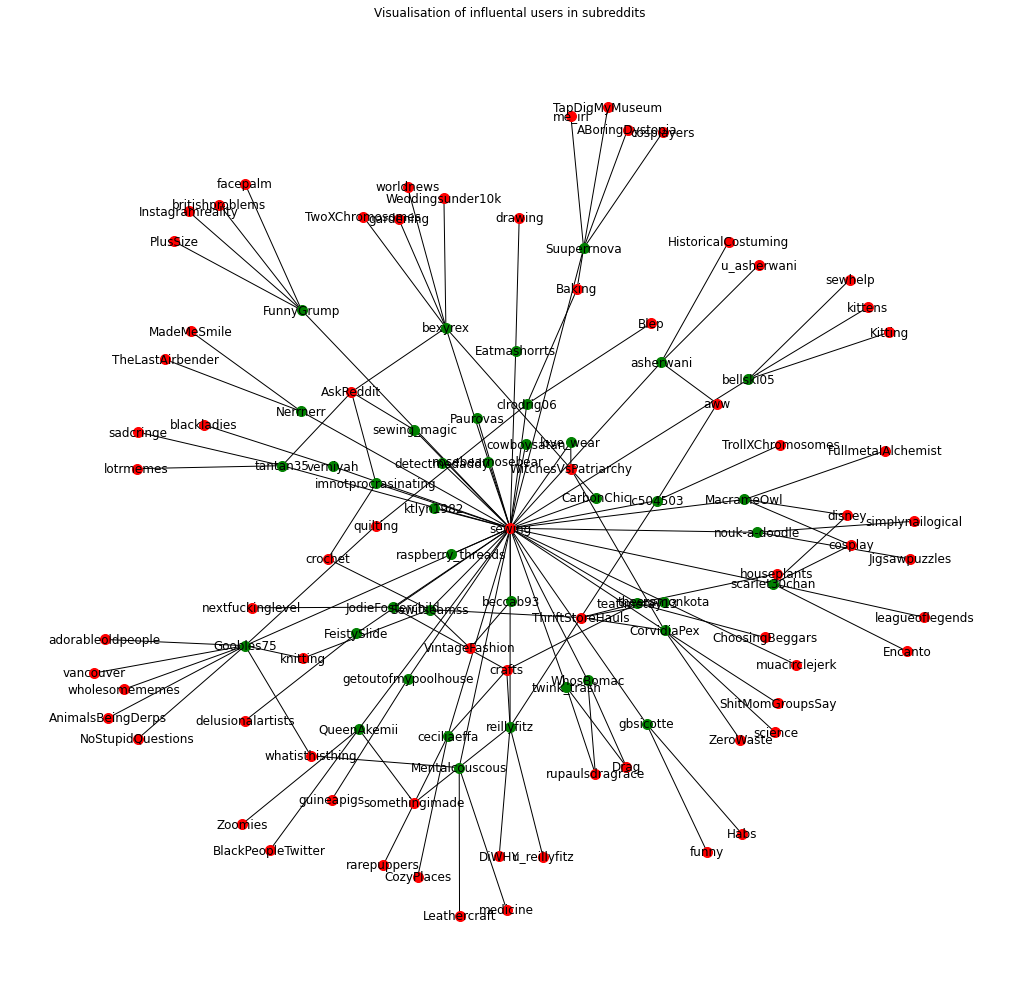

In [12]:
summary_data('sewing', 350)